# Chp 1 

In [2]:
import gym
import numpy as np

env=gym.make('CarRacing-v0')
env.reset()
actions = np.array([2, 0, 1])
env.step(actions)
env.render()
env.close()

Track generation: 944..1191 -> 247-tiles track


In [5]:
import gym
import pygame
from gym.utils.play import play

mapping = {(pygame.K_LEFT,): 0, (pygame.K_RIGHT,): 1}
play(gym.make("CartPole-v0"), keys_to_action=mapping)

pygame 2.5.2 (SDL 2.28.3, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


# 多臂机

## eps-greedy算法

In [7]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt
from src.utils.plot_utils import setup_mpl

setup_mpl(as_default=False)

n=10# 臂的数量
probs=np.random.rand(n) # 每个臂关联的隐藏概率
eps=0.2 # 用于ε贪婪动作选择的ε

In [9]:
def get_reward(prob, n=10):
    reward=0
    for i in range(n):
        if random.random() < prob:
            reward+=1
    return reward

In [14]:
trials = [get_reward(0.7) for _ in range(2000)]

(array([  1.,   3.,  15.,  67., 222., 391., 584., 450., 207.,  60.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

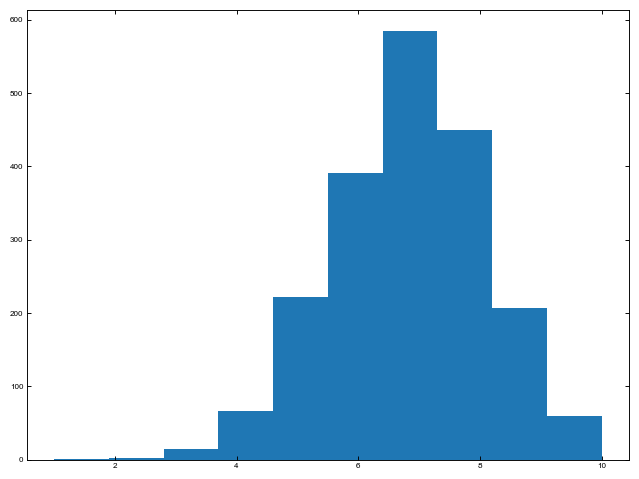

In [21]:
plt.hist(trials)

In [17]:
records = np.zeros((n, 2)) # 每个臂的记录，第一列是计数，第二列是平均奖励, 平均奖励根据次数不断更新

In [22]:
def update_record(record,action,r):
    new_r=(record[action,0] * record[action,1]+r) / (record[action,0]+1)
    record[action,0]+=1
    record[action,1]=new_r
    return record

In [23]:
def get_best_arm(record):
    arm_index=np.argmax(record[:,1],axis=0) # 对数组record的第二列调用NumPy的argmax函数
    return arm_index

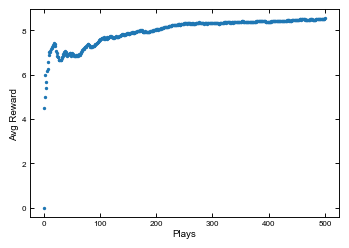

In [28]:
fig, ax=plt.subplots(1,1,figsize=(3.5,2.5) )
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
record=np.zeros((n,2)) # 随机初始化每个臂的奖励概率
probs=np.random.rand(n)
eps=0.2
rewards=[0] # 将数组record元素初始化为0
for i in range(500):
    if random.random() > eps: # 以概率0.8选择最佳动作 0.2选择随机动作 探索
        choice=get_best_arm(record)
    else:
        choice=np.random.randint(10) 

    r=get_reward(probs[choice]) # 计算选择臂的奖励
    record=update_record(record,choice,r) # 利用新数量和臂的奖励观察值更新数组record
    mean_reward=((i+1) * rewards[-1]+r)/(i+2)# 跟踪运行的平均奖励来评估整体表现
    rewards.append(mean_reward)
ax.scatter(np.arange(len(rewards)),rewards, s=2)

## softmax action selection

In [49]:
n = 10
tau = 1.3

In [50]:
def softmax(av, tau=1.12):
    softm=np.exp(av / tau) / np.sum( np.exp(av / tau) )
    return softm

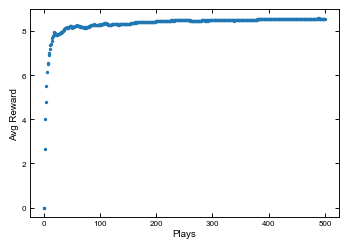

In [51]:
fig, ax=plt.subplots(1,1,figsize=(3.5,2.5) )
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
record=np.zeros((n,2)) # 随机初始化每个臂的奖励概率
probs=np.random.rand(n)

rewards=[0] # 将数组record元素初始化为0
for i in range(500):
    p = softmax(record[:, 1])
    choice = np.random.choice(np.arange(n), p=p) # 以概率选择最佳动作
    r=get_reward(probs[choice]) # 计算选择臂的奖励
    record=update_record(record,choice,r) # 利用新数量和臂的奖励观察值更新数组record
    mean_reward=((i+1) * rewards[-1]+r)/(i+2)# 跟踪运行的平均奖励来评估整体表现
    rewards.append(mean_reward)
ax.scatter(np.arange(len(rewards)),rewards, s=2)

- 对tau非常敏感
    - 如果tau太大，那么softmax函数会变得非常平坦，这样就会导致所有的动作都有相似的概率。
    - 如果tau太小，那么softmax函数会变得非常尖锐，这样就会导致只有最佳动作的概率会非常高，其他动作的概率会非常低。
    - 因此，tau的选择非常重要，它决定了探索和利用的平衡。

In [2]:
class ContextBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.init_distribution(arms)
        self.update_state()
        
    def init_distribution(self, arms):
        # Num states = Num Arms to keep things simple
        self.bandit_matrix = np.random.rand(arms,arms)
        #each row represents a state, each column an arm
        
    def reward(self, prob):
        reward = 0
        for i in range(self.arms):
            if random.random() < prob:
                reward += 1
        return reward
        
    def get_state(self):
        return self.state
    
    def update_state(self):
        self.state = np.random.randint(0,self.arms)
        
    def get_reward(self,arm):
        return self.reward(self.bandit_matrix[self.get_state()][arm])
        
    def choose_arm(self, arm):
        reward = self.get_reward(arm)
        self.update_state()
        return reward

In [5]:
import numpy as np
import torch
import random
arms = 10
N, D_in, H, D_out = 1, arms, 100, arms

In [7]:
env = ContextBandit(arms=10)
state = env.get_state()
reward = env.choose_arm(1)
print(state)

1
